<a href="https://colab.research.google.com/github/RunatK/NNForSomeFunction/blob/main/NNForSomeFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)
import torch

In [24]:
def target_function(x):
    return 2**x * torch.sin(2**-x)

In [25]:
class RegressionNet(torch.nn.Module):
    def __init__(self, countOfHiddenNeurrons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, countOfHiddenNeurrons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(countOfHiddenNeurrons, countOfHiddenNeurrons)
        self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(countOfHiddenNeurrons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

net = RegressionNet(100)

In [26]:
#Load dataset
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

tensor([[-1.5482e-04],
        [-1.0732e-03],
        [ 7.0097e-04],
        [-5.7608e-04],
        [ 6.5311e-04],
        [ 9.8906e-04],
        [-1.7836e-03],
        [ 1.5283e-03],
        [ 1.8686e-03],
        [ 2.1850e-03],
        [ 3.2003e-04],
        [ 2.6802e-03],
        [ 3.3656e-03],
        [-2.4106e-03],
        [ 1.0479e-03],
        [-4.6642e-03],
        [ 3.9665e-03],
        [ 4.9868e-03],
        [-4.1531e-03],
        [ 6.0007e-03],
        [-2.5418e-03],
        [-2.2237e-03],
        [ 8.5996e-03],
        [-3.8417e-03],
        [ 7.4946e-03],
        [-1.2848e-02],
        [-1.0455e-02],
        [-6.5003e-03],
        [-1.1817e-02],
        [-2.0529e-02],
        [-2.9806e-03],
        [ 2.4776e-02],
        [-2.3459e-02],
        [ 1.7232e-02],
        [-1.7709e-02],
        [ 2.7786e-02],
        [-4.1880e-02],
        [ 3.9170e-02],
        [ 4.1222e-03],
        [-5.7028e-02],
        [ 2.3339e-02],
        [ 6.8612e-02],
        [-1.0514e-02],
        [-8

In [27]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.02)

In [28]:
def loss(pred, target):
    value = (pred - target)**2
    return value.mean()

In [29]:
#Learning
for epoch_index in range(5000):
    optimizer.zero_grad()
    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()

In [30]:
def metric(pred, target):
   return (pred - target).abs().mean()

In [31]:
print(metric(net.forward(x_validation), y_validation).item())

0.018646804615855217


In [32]:
def predict(net, x, y):
    y_pred = net.forward(x)

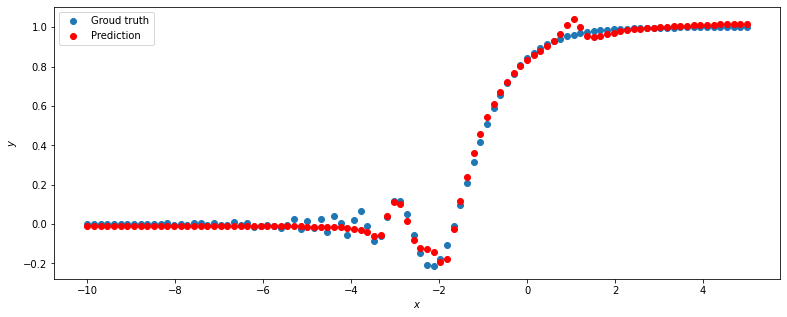

In [33]:
    plt.plot(x_validation.numpy(), y_validation.numpy(), 'o', label='Groud truth')
    plt.plot(x_validation.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.show()